# WL Gore Churn Model

This Jupyter Notebook is intended to demonstrate the full modeling process as a comparison to the use of SPSS/PCI. Certain steps have been omitted, primarily around the ingestion, cleansing, and merging of various datasets. This example begins with a completed analytical datamart.

## Declarations

In [43]:
import numpy as np
import pandas as pd
import numexpr
import seaborn as sn

In [45]:
%matplotlib inline

## Import Data

In [2]:
datamart = pd.read_csv('/home/jcroft/Python/WLGore/WLGORE_DATAMART.tsv','\t')

In [3]:
list(datamart)

['_SOLD_TO_NBR',
 '_SFDC_ACT_MKT_Electronic Enclosures_Sum',
 '_SFDC_ACT_MKT_Industrial_Sum',
 '_SFDC_ACT_MKT_Mobile Electronics_Sum',
 '_SFDC_ACT_MKT_Semicon & Test_Sum',
 '_SFDC_ACT_TYPE_Call_Sum',
 '_SFDC_ACT_TYPE_Email_Sum',
 '_SFDC_ACT_TYPE_Meeting_Sum',
 '_SFDC_ACT_TYPE_Other_Sum',
 '_SFDC_ACT_TYPE_Send Letter/Quote_Sum',
 '_SFDC_ACT_DAYS_SINCE_Sum',
 '_SFDC_ACT_DAYS_SINCE_Mean',
 '_SFDC_ACT_DAYS_SINCE_Min',
 '_SFDC_ACT_DAYS_SINCE_Max',
 '_SFDC_ACT_CNT',
 '_ITEM_COST_Sum',
 '_ITEM_COST_Mean',
 '_ITEM_PRICE_Sum',
 '_ITEM_PRICE_Mean',
 'DATE_ACCT_OPENED_Sum',
 'DATE_ACCT_OPENED_Mean',
 'ORDER_COST_AMT_Sum',
 'ORDER_COST_AMT_Mean',
 'ORDER_SALES_AMT_Sum',
 'ORDER_SALES_AMT_Mean',
 'UNIT_PRICE_Sum',
 'UNIT_PRICE_Mean',
 'USD_COST_AMT_Sum',
 'USD_COST_AMT_Mean',
 '_ITEM_PROFIT_Sum',
 '_ITEM_PROFIT_Mean',
 '_ITEM_DESC_(GAW325 With PET ring)__SHIPPED_ORDER_UOM_QTY_Sum',
 '_ITEM_DESC_**PER GORE, PART IS BEING REPL__SHIPPED_ORDER_UOM_QTY_Sum',
 '_ITEM_DESC_1 LOT CHARGE = 100 PCS__SHIPPED_

## Define Target

In [4]:
#Create a new field in the dataframe
datamart['target'] = 0

In [36]:
#Example of assigning a value to a selection within a dataframe
datamart.loc[datamart['_SOLD_TO_NBR'] >=620.0, 'target'] = 1

In [37]:
#Example of selecting rows in a dataframe matching a condition
datamart.loc[datamart['target']==1,'_SOLD_TO_NBR']

3            620.0
4            648.0
5            652.0
6            653.0
7            671.0
8          12707.0
9       11130758.0
10      11130793.0
11      11200053.0
12      11200161.0
13      11200288.0
14      11200341.0
15      11200365.0
16      11200395.0
17      11200496.0
18      11200606.0
19      11200616.0
20      11201269.0
21      11201316.0
22      11201324.0
23      11201336.0
24      11201348.0
25      11201362.0
26      11204656.0
27      11204679.0
28      11229644.0
29      11229679.0
30      11229750.0
31      11229766.0
32      11269255.0
           ...    
4864    57103482.0
4865    57103483.0
4866    57103485.0
4867    57103686.0
4868    57103712.0
4869    57103717.0
4870    57103726.0
4871    57104036.0
4872    57104199.0
4873    57104203.0
4874    57104218.0
4875    57104229.0
4876    57104354.0
4877    57104376.0
4878    57104813.0
4879    57104834.0
4880    57104835.0
4881    57104924.0
4882    57104939.0
4883    57104945.0
4884    57104949.0
4885    5710

In [38]:
#Define the actual target (aka label, aka "y")
datamart.loc[(datamart['_ORDER_WITHIN_180_Sum'] > 0) & (datamart['_ORDER_WITHIN_120_Sum'] == 0), 'target'] = 1

## Modeling

In [56]:
#Evaluate how the data should be cleansed
print "Contains NaN: ", np.any(np.isnan(datamart)) #Test to see if the data contains NaN
print "Is Rational: ", np.all(np.isfinite(datamart))  #Test to see if the data is rational

Contains NaN:  False
Is Rational:  True


In [19]:
#Do the cleansing
datamart = datamart.replace(np.nan, 0)

In [20]:
X = datamart.drop('target', axis=1)

In [21]:
y = datamart['target']


In [22]:
#Partition the data
from sklearn.cross_validation import train_test_split
# split the data with 50% in each set
X1, X2, y1, y2 = train_test_split(X, y, random_state=0, train_size=0.7)

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [24]:
model = LogisticRegression()
model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [25]:
model.fit(X1,y1)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

# Model Evaluation

In [26]:
# evaluate the model on the second set of data
y2_model = model.predict(X2)
accuracy_score(y2, y2_model)

0.99931926480599043

In [57]:
from sklearn.cross_validation import cross_val_score
cross_val_score(model, X, y, cv=5)

array([ 0.99285714,  0.99897855,  0.99897855,  1.        ,  1.        ])

In [28]:
#from sklearn.cross_validation import LeaveOneOut
#scores = cross_val_score(model, X, y, cv=LeaveOneOut(len(X)))


(4894,)

In [58]:
#Confusion Matrix
y_predict = model.predict(X2)
cm = confusion_matrix(y2, y_predict)
cm

array([[   0,    1],
       [   0, 1468]])

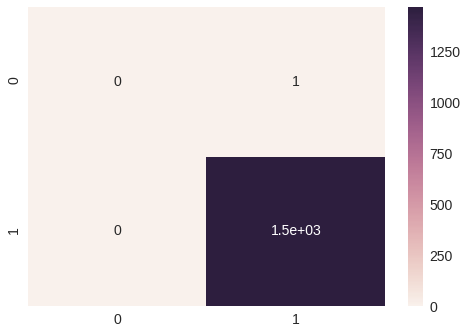

In [59]:
df_cm = pd.DataFrame(cm, range(2), range(2))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, annot=True,annot_kws={"size": 14})# font size

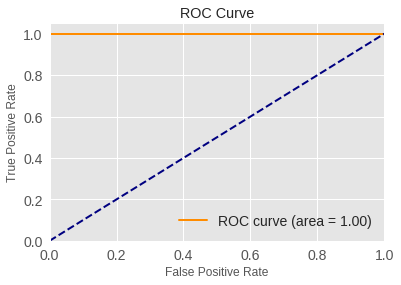

In [60]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

y_predict_probabilities = model.predict_proba(X2)[:,1]

fpr, tpr, _ = roc_curve(y2, y_predict_probabilities)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

# Model Deployment

In [51]:
#Store the final model to disk

In [52]:
#Deploy model as Flask API